## 1. Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import re 

In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [4]:
import nltk
import seaborn as sns

In [5]:
stop_words = set(stopwords.words('english'))

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [7]:
import pickle

In [8]:
from wordcloud import WordCloud

## 2. Reading in the dataset

In [9]:
data = pd.read_csv('labeled_data.csv', on_bad_lines='skip')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24781 entries, 0 to 24780
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24781 non-null  int64 
 1   count               24781 non-null  int64 
 2   hate_speech         24781 non-null  int64 
 3   offensive_language  24781 non-null  int64 
 4   neither             24781 non-null  int64 
 5   class               24781 non-null  int64 
 6   tweet               24781 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


## 3. Data preprocessing

In [11]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [12]:
data.tweet = data['tweet'].apply(data_processing)

In [13]:
data = data.drop_duplicates('tweet')

In [14]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [15]:
data['tweet'] = data['tweet'].apply(lambda x: lemmatizing(x))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24696 entries, 0 to 24780
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24696 non-null  int64 
 1   count               24696 non-null  int64 
 2   hate_speech         24696 non-null  int64 
 3   offensive_language  24696 non-null  int64 
 4   neither             24696 non-null  int64 
 5   class               24696 non-null  int64 
 6   tweet               24696 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


## 4. EDA on the data

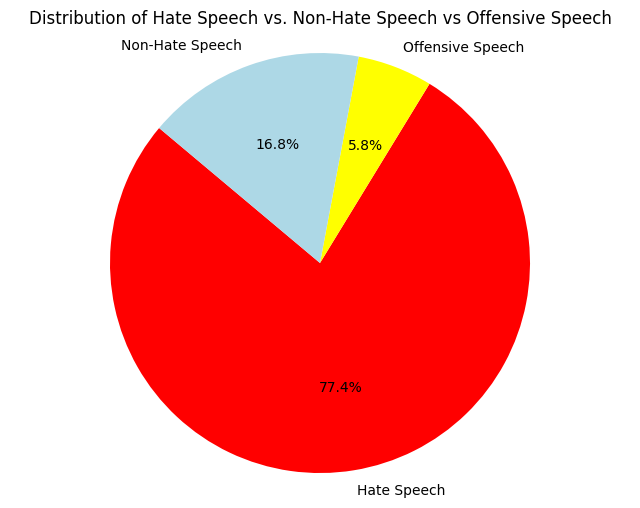

In [17]:
hate_speech_count = data[data['class'] == 1].shape[0]
offensive_speech_count = data[data['class'] == 0].shape[0]
non_hate_speech_count = data[data['class'] == 2].shape[0]
labels = ['Hate Speech', 'Offensive Speech', 'Non-Hate Speech']
sizes = [hate_speech_count, offensive_speech_count, non_hate_speech_count]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow', 'lightblue'])
plt.title('Distribution of Hate Speech vs. Non-Hate Speech vs Offensive Speech')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
data_eda = data

In [19]:
df_freq_hate = data_eda[(data_eda['class']==1) | (data_eda['class'] == 0)]
df_freq_not_hate = data[data_eda['class']==2]

In [20]:
data_hate = df_freq_hate['tweet']
data_not_hate = df_freq_not_hate['tweet']
data_hate

1        rt mleew17 boy dats coldtyga dwn bad cuffin da...
2        rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3              rt c_g_anderson viva_based look like tranny
4        rt shenikaroberts shit hear might true might f...
5        t_madison_x shit blows meclaim faithful somebo...
                               ...                        
24774                                        youre niggers
24775    youre retard hope get type 2 diabetes die suga...
24776    yous muthafin lie 8220lifeasking 20_pearls cor...
24778    young buck wan na eat dat nigguh like aint fuc...
24779                    youu got wild bitches tellin lies
Name: tweet, Length: 20537, dtype: object

In [23]:
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [24]:
# creating lists for processed hate & not hate data
process_hate = list(map(process_tweet, data_hate))
process_not_hate = list(map(process_tweet, data_not_hate))

In [29]:
total_vocab_hate = set()
for comment in process_hate:
    total_vocab_hate.update(comment)

In [30]:
# exact amount of not hate speech
total_vocab_NOT_hate = set()
for comment in process_not_hate:
    total_vocab_NOT_hate.update(comment)


In [31]:
flat_hate = [item for sublist in process_hate for item in sublist]
flat_not_hate = [item for sublist in process_not_hate for item in sublist]

In [34]:
from nltk.probability import FreqDist
hate_freq = FreqDist(flat_hate)
not_hate_freq = FreqDist(flat_not_hate)

In [36]:
hate_freq.most_common(20)

[('bitch', 8070),
 ('rt', 6267),
 ('bitches', 3024),
 ('like', 2451),
 ('hoes', 2306),
 ('pussy', 2064),
 ('im', 1842),
 ('hoe', 1828),
 ('dont', 1576),
 ('ass', 1559),
 ('got', 1464),
 ('fuck', 1397),
 ('get', 1282),
 ('shit', 1241),
 ('nigga', 1187),
 ('u', 1163),
 ('aint', 1109),
 ('lol', 893),
 ('niggas', 785),
 ('know', 713)]

In [37]:
hate_bar_counts = [x[1] for x in hate_freq.most_common(20)]
hate_bar_words = [x[0] for x in hate_freq.most_common(20)]

not_hate_bar_counts = [x[1] for x in not_hate_freq.most_common(20)]
not_hate_bar_words = [x[0] for x in not_hate_freq.most_common(20)]

In [39]:
from matplotlib import cm

color = cm.magma(np.linspace(.4,.8, 30))

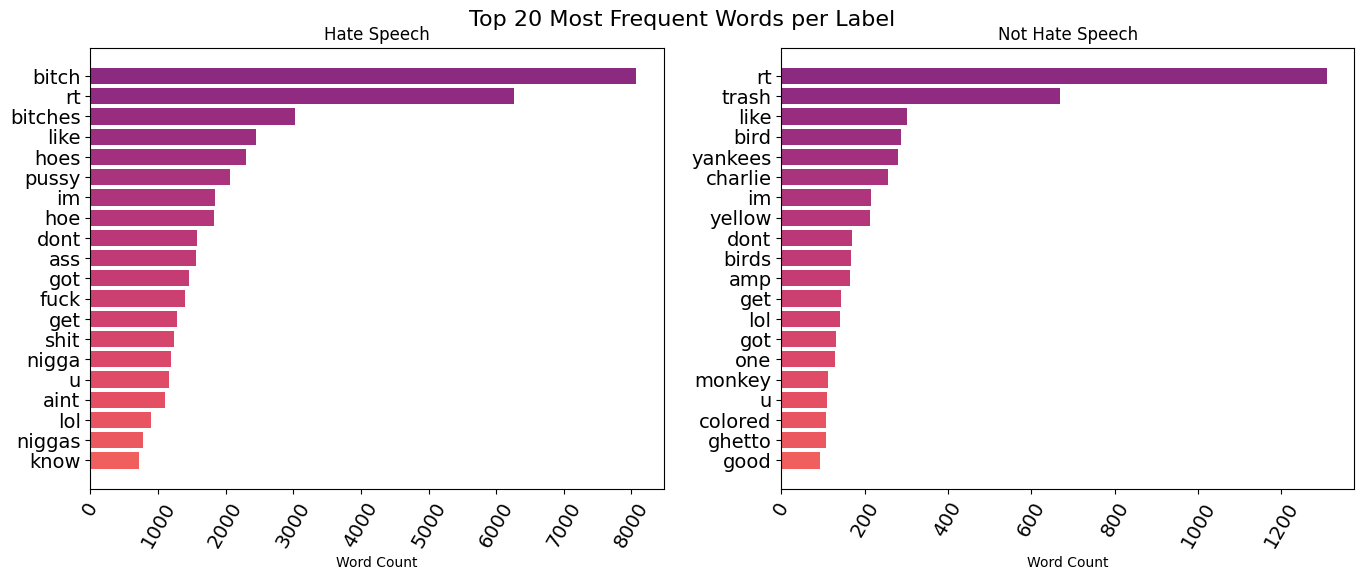

In [41]:
new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

# generating a bar chart on each axes
ax.barh(hate_bar_words, hate_bar_counts, color=color)
ax2.barh(not_hate_bar_words, not_hate_bar_counts, color=color)

ax.title.set_text('Hate Speech')
ax2.title.set_text('Not Hate Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)
plt.show()

In [42]:
from wordcloud import WordCloud
hate_dict = dict(zip(hate_bar_words, hate_bar_counts))
not_hate_dict = dict(zip(not_hate_bar_words, not_hate_bar_counts))

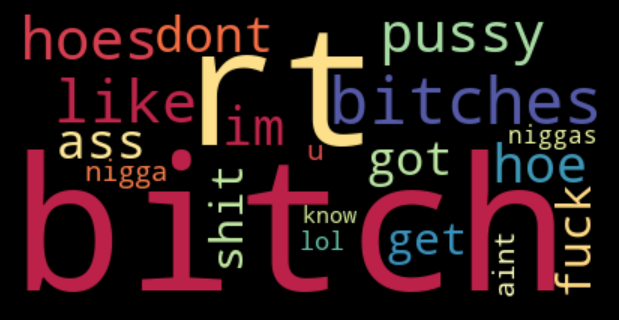

In [44]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(hate_dict)
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

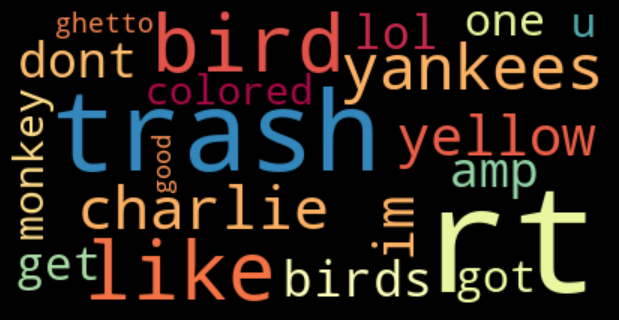

In [46]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_hate_dict)

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4. Train Test split

In [54]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...
...,...,...,...,...,...,...,...
24776,25291,3,0,2,1,1,yous muthafin lie 8220lifeasking 20_pearls cor...
24777,25292,3,0,1,2,2,youve gone broke wrong heart baby drove rednec...
24778,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...
24779,25295,6,0,6,0,1,youu got wild bitches tellin lies


In [55]:
vect=TfidfVectorizer(ngram_range=(1,2)).fit(data['tweet'])

In [56]:
X = data['tweet']

In [57]:
y = data['class']

In [58]:
X = vect.transform(X)

In [59]:
X

<24696x189321 sparse matrix of type '<class 'numpy.float64'>'
	with 415055 stored elements in Compressed Sparse Row format>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (y_test.shape))

Size of X_train (19756, 189321)
Size of Y_train (19756,)
Size of X_test (4940, 189321)
Size of Y_test (4940,)


## 5. Model Training

In [80]:
def plot_confusion_matrix(cf_matrix, class_names = [0, 1, 2]):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    tick_marks = range(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names, rotation=0)
    
    plt.tight_layout()
    plt.show()


### Model 1: Logistics Regression

#### Fitting the data 

In [64]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) #loading x_train and y_train data on model

C:\Users\Prisha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predicting the results

In [69]:
logreg_predict = logreg.predict(X_test) #predicting the value for test data

#### Performance measures

In [71]:
logreg_acc = accuracy_score(logreg_predict, y_test)
print(f"The accuracy of the given logistic regression model is: {logreg_acc*100}%")

The accuracy of the given logistic regression model is: 86.63967611336032%


In [73]:
classification_report_log = classification_report(logreg_predict, y_test)

In [75]:
print(classification_report_log)

              precision    recall  f1-score   support

           0       0.08      0.75      0.14        32
           1       0.98      0.87      0.92      4343
           2       0.61      0.87      0.72       565

    accuracy                           0.87      4940
   macro avg       0.56      0.83      0.59      4940
weighted avg       0.93      0.87      0.89      4940



In [83]:
cf_matrix_log = confusion_matrix(logreg_predict, y_test)

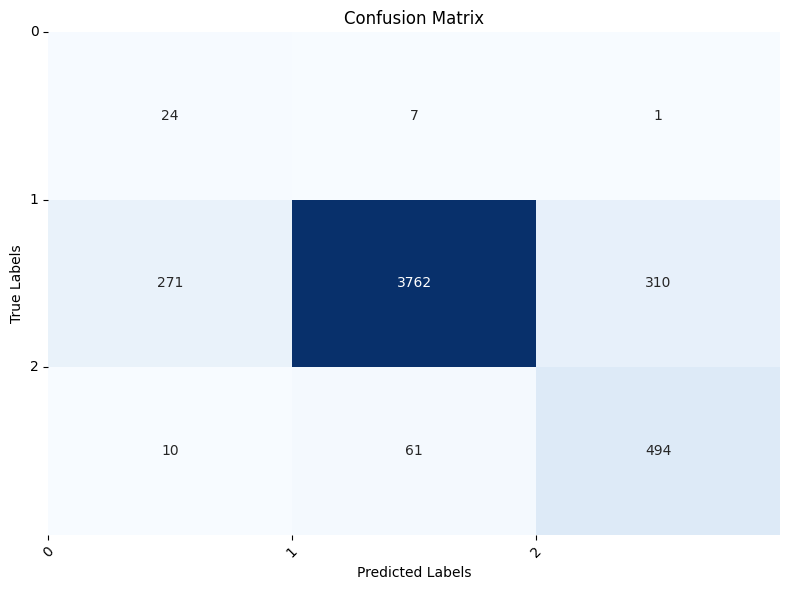

In [84]:
plot_confusion_matrix(cf_matrix_log)

### Model 2 Logistics Regression with hyperparameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#### Fitting the data

In [89]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.89
Best parameters:  {'C': 100, 'solver': 'lbfgs'}


#### Predicting results

In [92]:
log_reg_grid_pred = grid.predict(X_test)

#### Performance measures

In [95]:
log_reg_grid_acc = accuracy_score(log_grid_pred, y_test)
print("Test accuracy of the logistic regression model with hyper parameter tuning: {:.2f}%".format(log_reg_grid_acc*100))

Test accuracy of the logistic regression model with hyper parameter tuning: 89.07%


In [96]:
classification_report_log_grid = classification_report(log_grid_pred, y_test)
print(classification_report_log_grid)

              precision    recall  f1-score   support

           0       0.20      0.65      0.30        93
           1       0.97      0.90      0.93      4100
           2       0.79      0.85      0.82       747

    accuracy                           0.89      4940
   macro avg       0.65      0.80      0.68      4940
weighted avg       0.93      0.89      0.90      4940



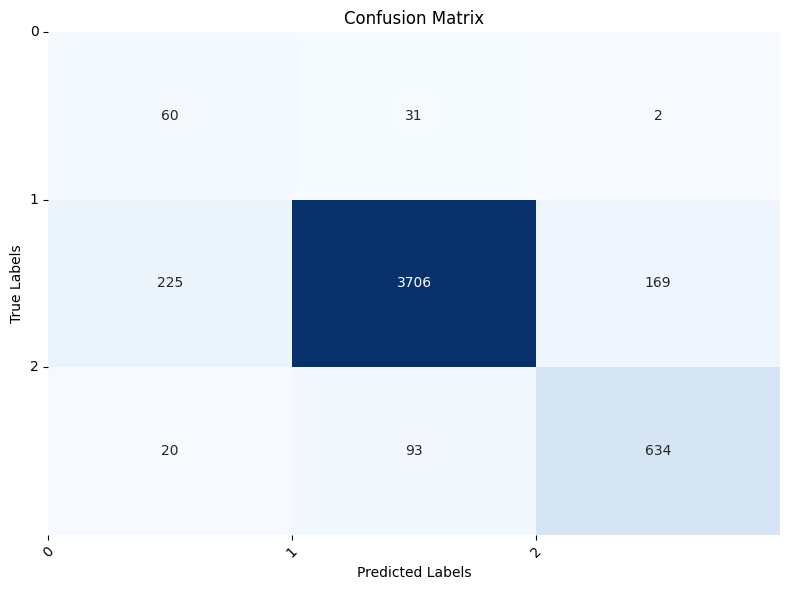

In [97]:
cf_log_grid = confusion_matrix(log_grid_pred, y_test)
plot_confusion_matrix(cf_log_grid)

### Model 3: Decision tree classifier

#### Fitting the data

In [99]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Making predictions

In [100]:
dtree_pred = dtree.predict(X_test) 

#### Performance Measures

In [103]:
dtree_acc = accuracy_score(dtree_pred, y_test)
print(f"The accuracy for the classification tree classifier: {dtree_acc*100}%") 


The accuracy for the classification tree classifier: 87.87449392712551%


In [104]:
classification_report_dtree = classification_report(dtree_pred, y_test)
print(classification_report_dtree)

              precision    recall  f1-score   support

           0       0.26      0.41      0.31       192
           1       0.93      0.92      0.93      3868
           2       0.85      0.78      0.82       880

    accuracy                           0.88      4940
   macro avg       0.68      0.70      0.69      4940
weighted avg       0.89      0.88      0.88      4940



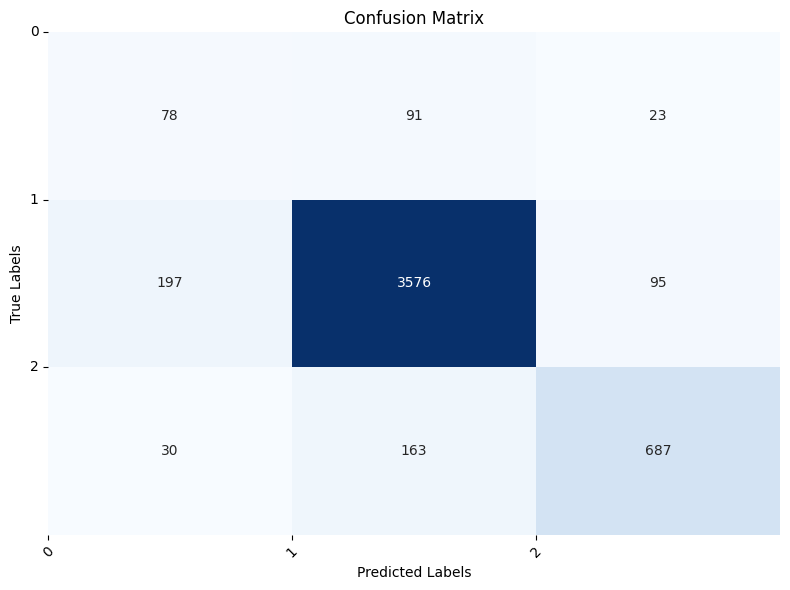

In [106]:
cf_dtree = confusion_matrix(dtree_pred, y_test)
plot_confusion_matrix(cf_dtree)

### Model 4: Random Forest

#### Model Fitting

In [121]:
rfc = RandomForestClassifier()

In [122]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

#### Making predictions

In [123]:
rfc_pred = rfc.predict(X_test)

#### Performance measure

In [124]:
rfc_ac = accuracy_score(y_test, rfc_pred)
print(f"The accuracy of the given Random Forest Classifier Model is: {rfc_ac*100}%")

The accuracy of the given Random Forest Classifier Model is: 87.57085020242916%


In [125]:
classification_report_rfc = classification_report(y_test, rfc_pred)
print(classification_report_rfc)

              precision    recall  f1-score   support

           0       0.63      0.09      0.16       305
           1       0.88      0.98      0.93      3830
           2       0.87      0.69      0.77       805

    accuracy                           0.88      4940
   macro avg       0.79      0.59      0.62      4940
weighted avg       0.86      0.88      0.85      4940



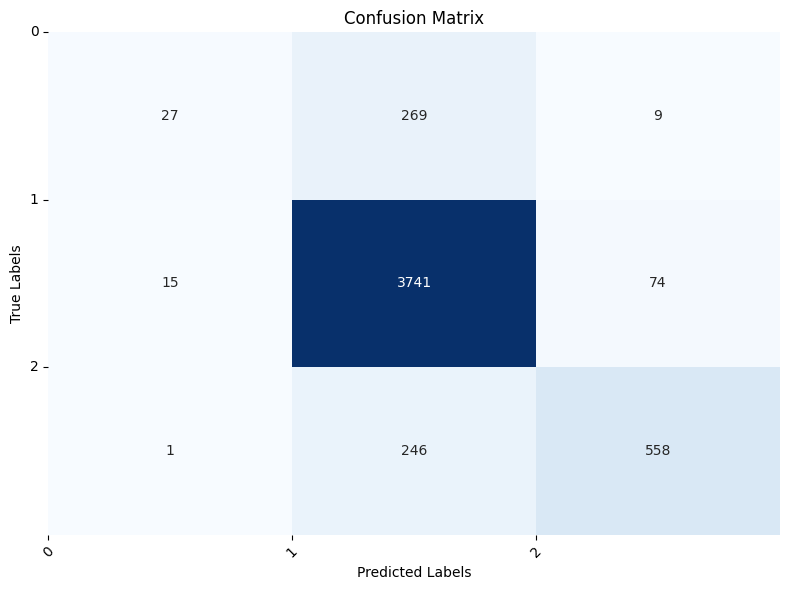

In [126]:
cf_rfc = confusion_matrix(y_test, rfc_pred)
plot_confusion_matrix(cf_rfc)

### Model 5 XG boost

#### Fitting the data

In [128]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### Prediciting the results

In [129]:
xgb_pred = xgb.predict(X_test)

#### Performance Measures

In [130]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"Accuracy score of the XG Boost algorithm is {xgb_acc*100}%")

Accuracy score of the XG Boost algorithm is 89.35222672064778%


In [131]:
classification_report_xgb = classification_report(y_test, xgb_pred)
print(classification_report_xgb)

              precision    recall  f1-score   support

           0       0.57      0.22      0.32       305
           1       0.94      0.94      0.94      3830
           2       0.77      0.94      0.84       805

    accuracy                           0.89      4940
   macro avg       0.76      0.70      0.70      4940
weighted avg       0.89      0.89      0.88      4940



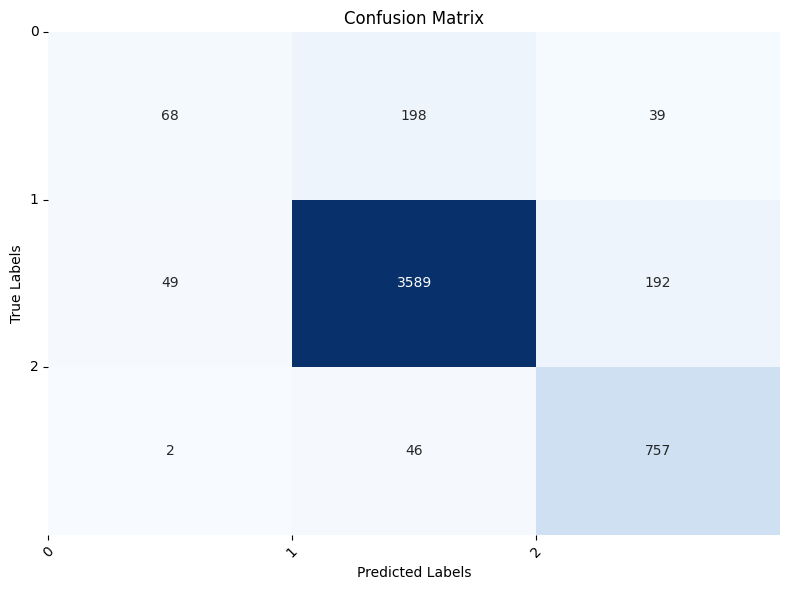

In [132]:
cf_xgb = confusion_matrix(y_test, xgb_pred)
plot_confusion_matrix(cf_xgb)

## Exporting the models

In [93]:
pickle.dump(xgb, open('model2.pkl', 'wb'))

In [52]:
test = "this isnt any normal method this is the best way to success"
test_pre = data_processing(test)
test_vec = vect.transform([test_pre])

In [46]:
pickle.dump(grid, open('modelgrid.pkl', 'wb'))

In [47]:
modeltest = pickle.load(open('modelgrid.pkl', 'rb'))

In [53]:
modeltest.predict(test_vec)

array([2], dtype=int64)

In [54]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vect, vectorizer_file)

In [69]:
test = "what classifies as hateful need not be always hateful"
test_pre = data_processing(test)
test_vec = vect.transform([test_pre])

In [70]:
dtree.predict(test_vec)

array([2], dtype=int64)

In [71]:
xgb.predict(test_vec)

array([2], dtype=int64)

In [72]:
pickle.dump(xgb, open('xgb_model.pkl', 'wb'))

In [74]:
model_xgb = pickle.load(open('xgb_model.pkl', 'rb'))

model_xgb.predict(test_vec)

In [75]:
model_xgb.predict(test_vec)

array([2], dtype=int64)

## Tabulating results

In [136]:
dict1 = {"Model Name": ["Logistic Regression", "Logistic Regression with Hyperparamter tuning", "Decision Tree Classifier", "Random Forest Regression", "XG Boost"], 
         "accuracy": [logreg_acc, log_reg_grid_acc, dtree_acc, rfc_ac, xgb_acc]}

In [138]:
import pandas as pd
dict1 = {"Model Name": ["Logistic Regression", "Logistic Regression with Hyperparamter tuning", "Decision Tree Classifier", "Random Forest Regression", "XG Boost"], 
         "accuracy": [logreg_acc, log_reg_grid_acc, dtree_acc, rfc_ac, xgb_acc]}

In [141]:
d1 = pd.DataFrame(dict1)
d1

,Model Name,accuracy
0,Logistic Regression,0.866397
1,Logistic Regression with Hyperparamter tuning,0.890688
2,Decision Tree Classifier,0.878745
3,Random Forest Regression,0.875709
4,XG Boost,0.893522
